In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:

import torch
import torch.nn as nn

In [6]:

df= pd.read_csv("D:/niyati/Stock-Price-Prediction-main/netflix.csv")
closed_prices = df["Close"]

In [7]:
seq_len = 15

In [8]:
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

In [9]:
X=[]
Y=[]


In [10]:

for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i+ seq_len])
    Y.append(scaled_price[i+seq_len])

In [11]:
X = np.array(X)[... , None]
Y = np.array(Y)[... ,None]


In [12]:
train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()

In [13]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size, 1)
    def forward(self , x):
        output,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])
    

In [14]:
model = Model(1,64)

In [15]:
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)

In [16]:
loss_fn = nn.MSELoss()

In [17]:

num_epochs=100

In [18]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss=loss_fn(output,train_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10==0 and epoch !=0:
        print(epoch , "epoch loss", loss.detach().numpy())

10 epoch loss 0.006040637
20 epoch loss 0.00584963
30 epoch loss 0.0042214943
40 epoch loss 0.004024518
50 epoch loss 0.0035673263
60 epoch loss 0.0030217562
70 epoch loss 0.002152571
80 epoch loss 0.00052463164
90 epoch loss 0.0003398477


In [19]:
model.eval()
with torch.no_grad():
    output=model(test_x)

In [20]:

pred=mm.inverse_transform(output.numpy())
real=mm.inverse_transform(test_y.numpy())


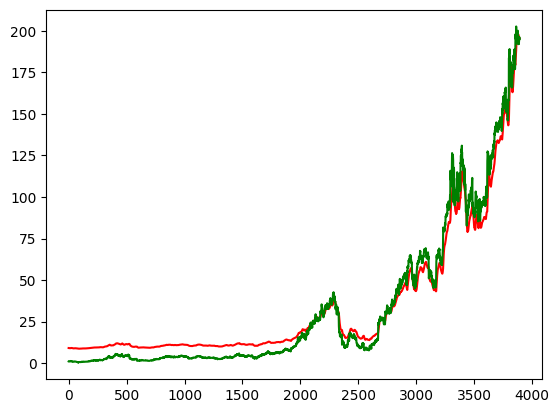

In [21]:

plt.plot(pred.squeeze(),color="red",label="predicted")
plt.plot(real.squeeze(),color="green",label="real")
plt.show()
